In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st
import datetime as dt

In [4]:
# file path
filepath = '../Resources/cleanedCaseSurveillance.csv'

# Reading CSV File
org_data_df = pd.read_csv(filepath)
org_data_df

,CDC Report Date,Covid Status,Gender,Age Group,Race/Ethnicity,Hospitalized,Pre-Existing Condition
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
3,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
4,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
...,...,...,...,...,...,...,...
991891,2020/06/10,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,Yes,Yes
991892,2020/06/08,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,Yes
991893,2020/06/10,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,Yes
991894,2020/06/01,Laboratory-confirmed case,Female,30 - 39 Years,Hispanic/Latino,No,No


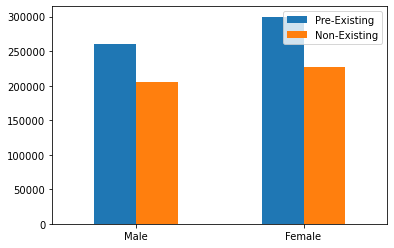

In [5]:
hosp_y = len(org_data_df.loc[(org_data_df["Pre-Existing Condition"] == "Yes")])
hosp_n = len(org_data_df.loc[(org_data_df["Pre-Existing Condition"] == "No")])

male_pre = len(org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Pre-Existing Condition"] == "Yes")])
female_pre = len(org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Pre-Existing Condition"] == "Yes")])

male_nopre = len(org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Pre-Existing Condition"] == "No")])
female_nopre = len(org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Pre-Existing Condition"] == "No")])

gender = ["Male", "Female"]
prex_df = pd.DataFrame({"Pre-Existing": [male_pre, female_pre], "Non-Existing" : [male_nopre, female_nopre]}, index = gender)
prex_df.plot.bar(rot = 0)

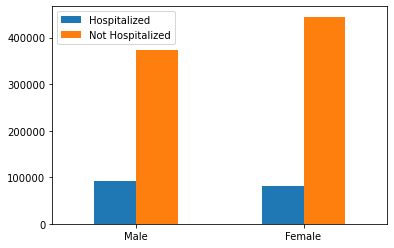

In [6]:
male_hy = len(org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Hospitalized"] == "Yes")])
female_hy = len(org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Hospitalized"] == "Yes")])
male_hn = len(org_data_df.loc[(org_data_df["Gender"] == "Male") & (org_data_df["Hospitalized"] == "No")])
female_hn = len(org_data_df.loc[(org_data_df["Gender"] == "Female") & (org_data_df["Hospitalized"] == "No")])

hosp_df = pd.DataFrame({"Hospitalized" : [male_hy, female_hy], "Not Hospitalized" : [male_hn, female_hn]}, index = gender)
hosp_df.plot.bar(rot = 0)

,Pre-Existing & Hospitalized,Non-Existing & Hospitalized,Hospitalized w/ Pre-Existing Condition %
Male,81746,10079,89.02 %
Female,72720,9369,88.59 %


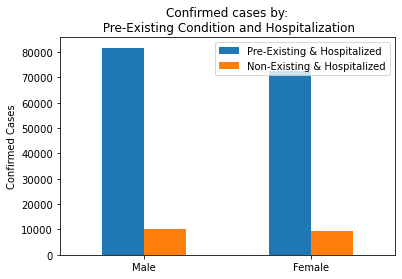

In [14]:
# Look at males and number of hospitalizations by pre-existing conditions
mhp = len(org_data_df.loc[(org_data_df["Gender"] == "Male") &
                      (org_data_df["Pre-Existing Condition"] == "Yes") &
                      (org_data_df["Hospitalized"] == "Yes")])
fhp = len(org_data_df.loc[(org_data_df["Gender"] == "Female") &
                      (org_data_df["Pre-Existing Condition"] == "Yes") &
                      (org_data_df["Hospitalized"] == "Yes")])

mhnp = len(org_data_df.loc[(org_data_df["Gender"] == "Male") &
                      (org_data_df["Pre-Existing Condition"] == "No") &
                      (org_data_df["Hospitalized"] == "Yes")])
fhnp = len(org_data_df.loc[(org_data_df["Gender"] == "Female") &
                      (org_data_df["Pre-Existing Condition"] == "No") &
                      (org_data_df["Hospitalized"] == "Yes")])
prex = ["Male", "Female"]
prex_df = pd.DataFrame({"Pre-Existing & Hospitalized" : [mhp,fhp], "Non-Existing & Hospitalized" : [mhnp,fhnp]}, index = prex)
ax = prex_df.plot(kind='bar', rot=0) 
ax.set_ylabel("Confirmed Cases")
ax.set_title("Confirmed cases by:\n Pre-Existing Condition and Hospitalization")

ax.legend(loc = "best")
# plt.show()
plt.savefig("../Images/MaleFemalePreXvsHosp.png")
total_males = mhp + mhnp
total_females = fhp + fhnp
prex_df["Hospitalized w/ Pre-Existing Condition %"] = [f"{round((mhp/total_males)*100,2)} %", f"{round((fhp/total_females)*100,2)} %"]
prex_df